In [1]:
%pylab inline
from splikes import *

Populating the interactive namespace from numpy and matplotlib
Plasticnet version  0.1.0
Splikes version  0.1.0


## 1D spiking neuron

In [2]:
patterns=array([10])
pre=neurons.poisson_pattern(patterns)
pre.time_between_patterns=2
pre.save_spikes_begin=0.0
pre.save_spikes_end=10.0

sim=simulation(10,dt=0.0001)

('Time Elapsed...', '0.01 s')
CPU times: user 8.84 ms, sys: 9.26 ms, total: 18.1 ms
Wall time: 18 ms


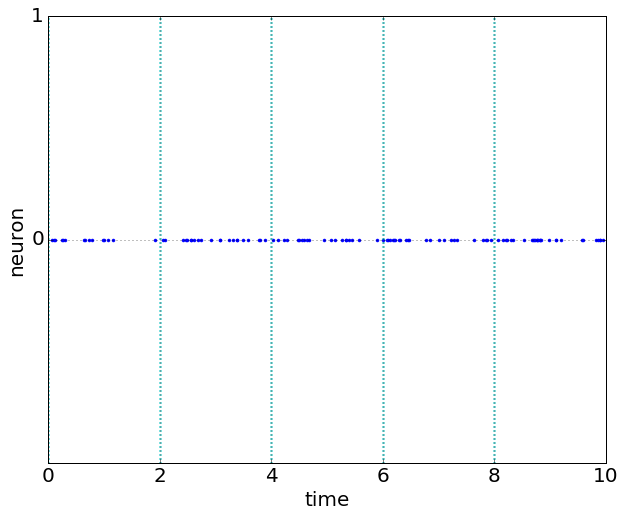

In [3]:
%time run_sim(sim,[pre],[])
pre.plot_spikes()

spike counts per second

In [4]:
spike_counts(arange(0,10+1),pre.saved_spikes)

array([[ 11.,   4.,  11.,  11.,  11.,   9.,  14.,  10.,  18.,  10.]])

### 1D Non-constant rates

('Time Elapsed...', '0.01 s')
CPU times: user 10.4 ms, sys: 9.04 ms, total: 19.5 ms
Wall time: 18.8 ms
[[  1.   4.   6.   3.   5.   2.   5.   4.   2.   7.]
 [ 48.  51.  46.  59.  55.  63.  49.  51.  51.  49.]]


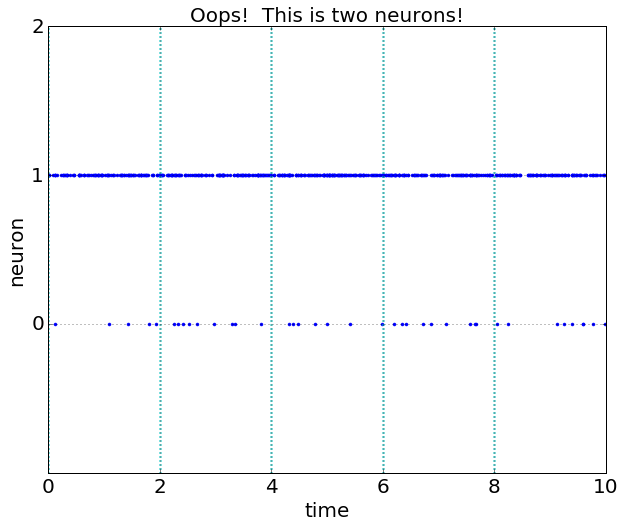

In [6]:
pre=neurons.poisson_pattern([5,50],
                            sequential=True,
                            )
pre.time_between_patterns=2
pre.save_spikes_begin=0.0
pre.save_spikes_end=10.0

sim=simulation(10,dt=0.0001)

%time run_sim(sim,[pre],[])
pre.plot_spikes()
title('Oops!  This is two neurons!')

print(spike_counts(arange(0,10+1),pre.saved_spikes))

('Time Elapsed...', '0.01 s')
CPU times: user 8.97 ms, sys: 8.77 ms, total: 17.7 ms
Wall time: 17.6 ms


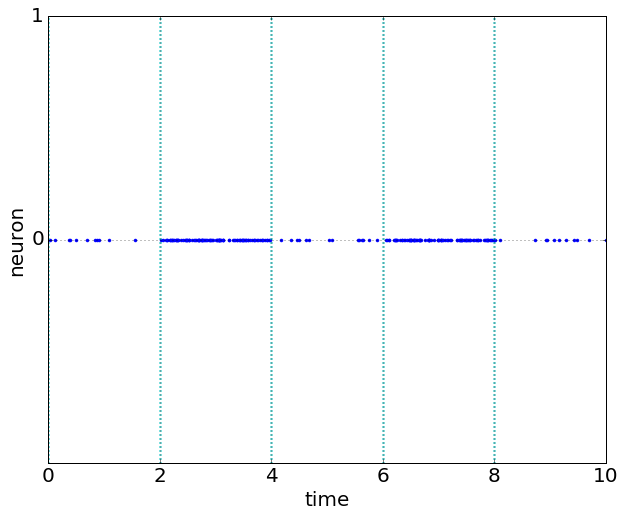

In [7]:
pre=neurons.poisson_pattern([5,50],
                            shape=(2,1),
                            sequential=True,
                            )
pre.time_between_patterns=2
pre.save_spikes_begin=0.0
pre.save_spikes_end=10.0

sim=simulation(10,dt=0.0001)

%time run_sim(sim,[pre],[])
pre.plot_spikes()


## 1D SRM0 neuron

In [5]:
pre=neurons.poisson_pattern([10])
post=neurons.srm0(1)

c=connection(pre,post,[1,1])

sim=simulation(10,dt=0.0001)
sim.monitor(post,['u',],0.001)

run_sim(sim,[pre,post],[c])

('Time Elapsed...', '0.07 s')


In [6]:
sim.monitors['u'].array()

array([ 0.        ,  0.        ,  0.        , ...,  0.48441104,
        0.47959107,  0.47481906])

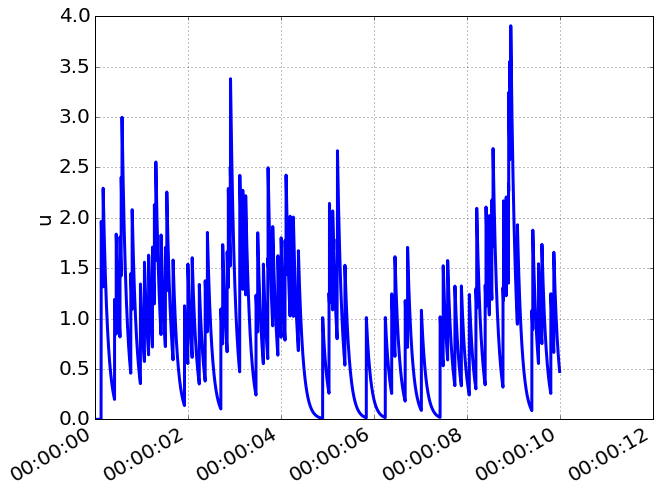

In [7]:
m=sim.monitors['u']
m.plot()

### Checking the effect connection strength

('Time Elapsed...', '0.07 s')


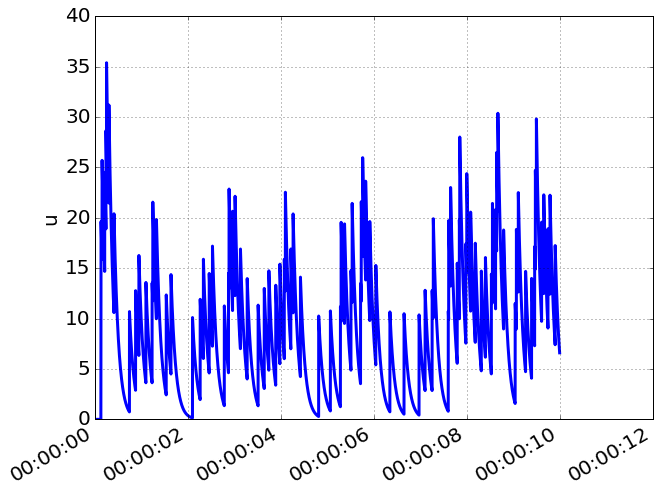

In [11]:
pre=neurons.poisson_pattern([10])
post=neurons.srm0(1)

c=connection(pre,post,[10,10])

sim=simulation(10,dt=0.0001)
sim.monitor(post,['u',],0.001)

run_sim(sim,[pre,post],[c])

m=sim.monitors['u']
m.plot()

In [12]:
mean(m.array())

8.8299755163460762

### Running many different connection strengths

In [14]:
w_arr=linspace(1,100,100)
print(w_arr)

[   1.    2.    3.    4.    5.    6.    7.    8.    9.   10.   11.   12.
   13.   14.   15.   16.   17.   18.   19.   20.   21.   22.   23.   24.
   25.   26.   27.   28.   29.   30.   31.   32.   33.   34.   35.   36.
   37.   38.   39.   40.   41.   42.   43.   44.   45.   46.   47.   48.
   49.   50.   51.   52.   53.   54.   55.   56.   57.   58.   59.   60.
   61.   62.   63.   64.   65.   66.   67.   68.   69.   70.   71.   72.
   73.   74.   75.   76.   77.   78.   79.   80.   81.   82.   83.   84.
   85.   86.   87.   88.   89.   90.   91.   92.   93.   94.   95.   96.
   97.   98.   99.  100.]


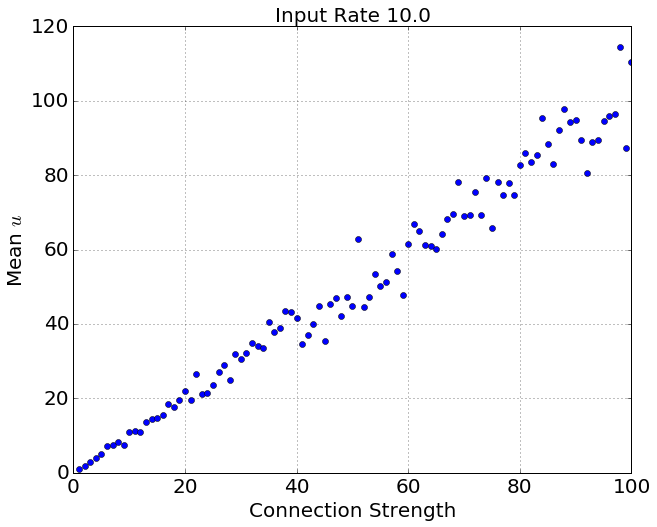

In [15]:
mean_arr=[]
rate=10
for w in w_arr:
    
    pre=neurons.poisson_pattern([rate])
    post=neurons.srm0(1)
    
    c=connection(pre,post,[w,w])
    
    sim=simulation(10,dt=0.0001)
    sim.monitor(post,['u',],0.001)
    
    run_sim(sim,[pre,post],[c],print_time=False)
    
    u=sim.monitors['u'].array()
    mean_arr.append(mean(u))
    
plot(w_arr,mean_arr,'o')
xlabel('Connection Strength')
ylabel('Mean $u$')
title('Input Rate %.1f' % rate)


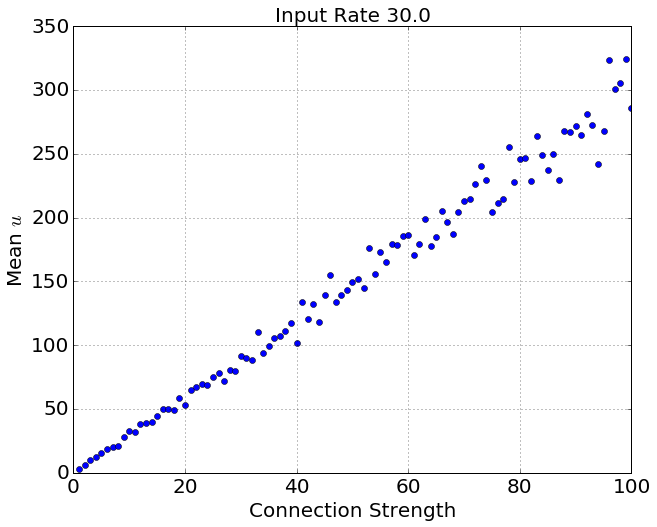

In [16]:
mean_arr=[]
rate=30
for w in w_arr:
    
    pre=neurons.poisson_pattern([rate])
    post=neurons.srm0(1)
    
    c=connection(pre,post,[w,w])
    
    sim=simulation(10,dt=0.0001)
    sim.monitor(post,['u',],0.001)
    
    run_sim(sim,[pre,post],[c],print_time=False)
    
    u=sim.monitors['u'].array()
    mean_arr.append(mean(u))
    
plot(w_arr,mean_arr,'o')
xlabel('Connection Strength')
ylabel('Mean $u$')
title('Input Rate %.1f' % rate)


Can you figure out an equation for the mean $u$ for a given connection strength and input rate?

## 2D Spiking Neuron

sequential
New pattern 0
10.0
20.0
Time to next pattern: 2.000000
sequential
New pattern 1
50.0
10.0
Time to next pattern: 4.000000
sequential
New pattern 0
10.0
20.0
Time to next pattern: 6.000000
sequential
New pattern 1
50.0
10.0
Time to next pattern: 8.000000
sequential
New pattern 0
10.0
20.0
Time to next pattern: 10.000000
sequential
New pattern 1
50.0
10.0
Time to next pattern: 12.000000
('Time Elapsed...', '0.09 s')


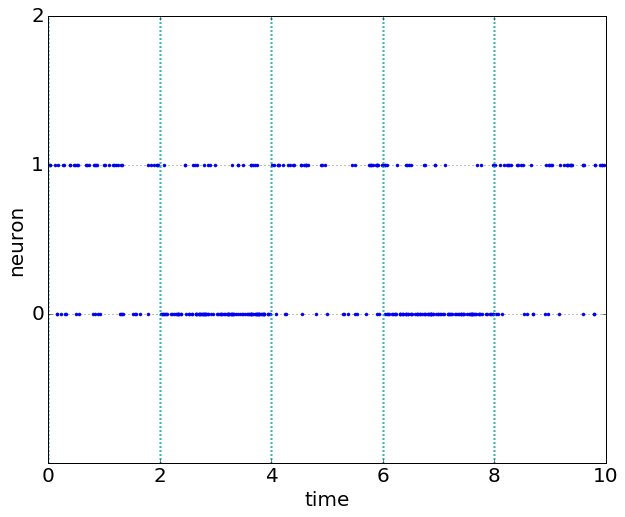

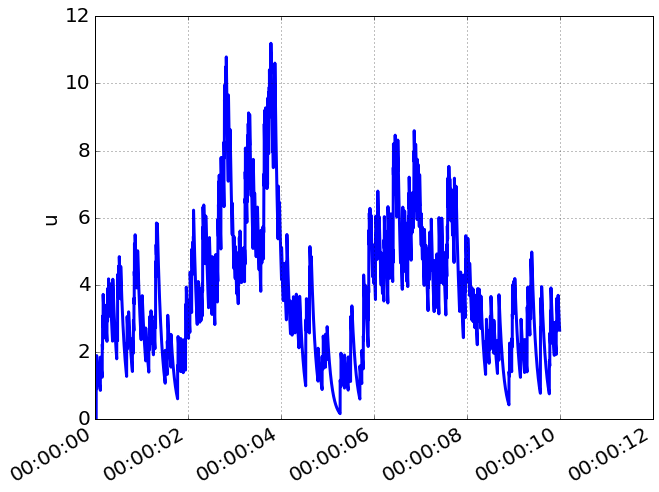

In [17]:
pre=neurons.poisson_pattern([[10,20],[50,10]],
                            sequential=True,
                            verbose=True
                            )
pre.time_between_patterns=2
pre.save_spikes_begin=0.0
pre.save_spikes_end=10.0


post=neurons.srm0(1)

c=connection(pre,post,[1,1])

sim=simulation(10,dt=0.0001)
sim.monitor(post,['u',],0.001)

run_sim(sim,[pre,post],[c])


figure()
pre.plot_spikes()


figure()
m=sim.monitors['u']
m.plot()

Can you figure out an equation to provide the mean $u$ given the two input rate values and the two connection strengths?